In [1]:
import pymolviz as pmv
import numpy as np

## IsoSurfaces
While transparent volumes are a good tool to show volumetric data, we are sometimes not interested in all of the volumetric data or we want to combine two different volumetric information. For this we can use _IsoSurfaces_. They are defined by _GridData_ and a _level_. The surface that is drawn is then determined by the points where the values of the GridData correspond to the _level_. As those points generally do not fall onto the grid points themselves, [PyMOL uses a form of marching cubes to determine the surface](https://pymolwiki.org/index.php/Isosurface).

We'll start with our simple cube example to get a feeling for the IsoSurfaces:

In [2]:
grid = np.array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]])

values = np.sum(grid, axis=1)
grid_data = pmv.GridData(values, grid, name = "grid_data")

In [3]:
s1 = pmv.IsoSurface(grid_data, 1.5, name = "basic_surface")
labels1 = pmv.Labels(grid, values, name = "basic_labels")
pmv.Script([s1, labels1]).write("out/basic_surface.py")

One important use-case of _IsoSurfaces_ is to map data from different GridData onto it. For now we will create another mock-data giving the distance to \[0, 0, 1\].

In [4]:
values2 = np.linalg.norm(grid - np.array([0,0,1]), axis=1)
grid_data2 = pmv.GridData(values2, grid, name = "grid_data2")
labels2 = pmv.Labels(grid, [f"{v:.3f}" for v in values2], name = "basic_labels2")
pmv.Script([grid_data2, labels2]).write("out/grid_data2.py")

In order to color an _IsoSurface_ from another _GridData_, we now need to create a _ColorRamp_ object. _ColorRamps_ assign a color from a _ColorMap_ to every point of a _GridData_ based on its value on that point (similar to what is done with _Points_).
Thus a _ColorRamp_ takes in a _GridData_ object under the keyword _data_, detailing the grid points and their values as well as a _colormap_ (which again can be a string mapping onto matplotlib colormaps, a matplotlib colormap itself or a PyMOLViz _ColorMap_).

_ColorRamps_ are _Displayables_ and therefore have a _name_ and can be written directly as a script via the _write_ method.

As an example, we will create a _ColorRamp_ from the euclidean distance data and map it onto the IsoSurface for the manhatten distance.

In [5]:
c_ramp = pmv.ColorRamp(grid_data2, name = "color_ramp")
s2 = pmv.IsoSurface(grid_data, 1.5, name = "colored_surface", color = c_ramp)
pmv.Script([s2, labels1]).write("out/colored_surface.py")

Using the N-methyl acetamide example, we can draw an IsoSurface at a density level of 0.01
and color it by the electrostatic potential.

In [15]:
density_data = pmv.GridData.from_xyz("../data/td.xyz", name = "density_data")
potential_data = pmv.GridData.from_xyz("../data/tp.xyz", name = "potential_data")
cmap = pmv.ColorMap([0, 2])
c_ramp2 = pmv.ColorRamp(potential_data, name = "color_ramp2", colormap = pmv.ColorMap([0, 2]))
s3 = pmv.IsoSurface(density_data, 0.01, name = "potential_surface", color = c_ramp2, transparency = 0.5)
s3.write("out/potential_surface.py")

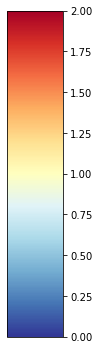

In [16]:
cmap.get_figure()

In [12]:
np.min(potential_data.values)

0.00936803

Using the data from before we can draw an IsoSurface at different levels of 2mFo-dFc density.

In [7]:
from rdkit import Chem
prot = Chem.MolFromPDBFile('../data/4de3.pdb')
positions = prot.GetConformer().GetPositions()
buffer = 5


In [8]:
# bfs from a bromine
bromine = [a for a in prot.GetAtoms() if a.GetAtomicNum() == 35][0]
cur_indices = [bromine.GetIdx()]; found_indices = [bromine.GetIdx()]
while(len(cur_indices) > 0):
    next_indices = [a.GetIdx() for a in prot.GetAtomWithIdx(cur_indices[0]).GetNeighbors() if a.GetIdx() not in found_indices]
    found_indices.extend(next_indices)
    cur_indices.extend(next_indices)
    cur_indices = cur_indices[1:]
# determine box
used_positions = np.array([positions[i] for i in found_indices])
min_pos = np.min(used_positions, axis = 0) - buffer
max_pos = np.max(used_positions, axis = 0) + buffer
data = pmv.GridData.from_mtz('../data/4de3_phases.mtz', min_pos = min_pos, max_pos = max_pos, step_sizes = [1, 1, 1], name = 'mtz_4de3')

In [9]:
s1 = pmv.IsoSurface(data, name = "mtz_4de3_surface", level = 0, selection = "sele", carve = 3, transparancy = 0.3)
s1.write("out/mtz_4de3_surface.py")    

TypeError: __init__() got an unexpected keyword argument 'transparancy'